In [ ]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 7.5 MB/s 


In [ ]:
import os
import sys

from urllib.request import urlretrieve

import Bio
from Bio import SeqIO, SearchIO, Entrez
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio.Blast import NCBIWWW
from Bio.Data import CodonTable

print("Python version:", sys.version_info)

Python version: sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)


In [ ]:
pip install Squiggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 7.4 MB/s 
     |████████████████████████████████| 102 kB 30.6 MB/s 
  Created wheel for pyfaidx: filename=pyfaidx-0.7.0-py3-none-any.whl size=27697 sha256=0d28d539c191629373023f6746923dc840f209af446a95ad4648c8c313e6a566
  Stored in directory: /root/.cache/pip/wheels/df/6b/ce/46374a70af569061fa10a6c16525b0d8efe2d9a4069f8a144a
Successfully built pyfaidx


In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

**Importing the DNA Sequence**

In [ ]:
input_file = "BCSIR-JU-01.fasta"

fasta_loc = ("BCSIR-JU-01.fasta")

if not os.path.exists(input_file):
    urlretrieve(fasta_loc, input_file)

In [ ]:
for record in SeqIO.parse(input_file, "fasta"):
    print(record.id)

BCSIR-JU-01


**DNA Information**

In [ ]:
dna_sequence = SeqIO.read(input_file, "fasta")
dna_sequence.seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AGC')

In [ ]:
print("Sequence length (bp)", len(dna_sequence))

Sequence length (bp) 29854


In [ ]:
print("GC content (%)", GC(dna_sequence.seq))

GC content (%) 37.991558920077715


In [ ]:
a=dna_sequence.seq.count('A') 
t=dna_sequence.seq.count('T') 
g=dna_sequence.seq.count('G') 
c=dna_sequence.seq.count('C') 

In [ ]:
a

8913

In [ ]:
# initialize data of lists.
data = {'A': [a],'T': [t],'G': [g],'C': [c]}
 
# Create DataFrame
DNAatgc= pd.DataFrame(data)
DNAatgc

,A,T,G,C
0,8913,9595,5857,5484


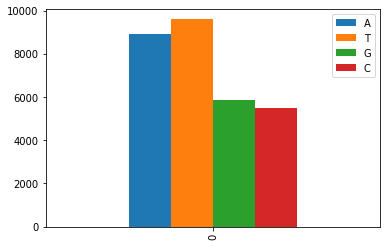

In [ ]:
DNAatgc.plot.bar()

**DNA to RNA Transcription**

In [ ]:
DNA = dna_sequence.seq #Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUUGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUUGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUAAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

**Protien Transalation**

In [ ]:
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFCPGVTER*DGEPCPWFQRENTRPTQFACFTGLRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*ISICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df

,0
0,"(I, K, G, L, Y, L, P, R)"
1,"(Q, T, N, Q, L, S, I, S, C, R, S, V, L)"
2,"(T, N, F, K, I, C, V, A, V, T, R, L, H, A)"
3,"(C, T, H, A, V)"
4,"(L, I, T, N, Y, C, R)"
...,...
770,"(S, H, I, A, I, F, N, Q, C, V, T, L, G, R, T)"
771,"(K, S, H, H, I, F, T, E, A, T, R, S, T, I, E, ..."
772,(F)
773,()


In [ ]:
print('Total proteins:', len(df))

Total proteins: 775


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                                              sequence  \
0                             (I, K, G, L, Y, L, P, R)   
1              (Q, T, N, Q, L, S, I, S, C, R, S, V, L)   
2           (T, N, F, K, I, C, V, A, V, T, R, L, H, A)   
3                                      (C, T, H, A, V)   
4                                (L, I, T, N, Y, C, R)   
5    (Q, D, T, S, N, S, S, I, F, C, R, L, L, T, V, ...   
6    (D, G, E, P, C, P, W, F, Q, R, E, N, T, R, P, ...   
7                          (R, W, H, L, W, L, S, R, S)   
8                                (K, R, R, F, A, S, T)   
9    (T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...   
10                (A, G, S, R, T, R, R, H, S, V, R, S)   
11                                                 (W)   
12   (D, T, W, C, P, C, P, S, C, G, R, N, T, S, G, ...   
13                                              (E, R)   
14                                                  ()   
15                                     (R, S, W, W, P)   
16            

In [ ]:
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()

,0
count,775
unique,624
top,()
freq,70


In [ ]:
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20

Total proteins: 775


,sequence,sequence_str,length
0,"(I, K, G, L, Y, L, P, R)",IKGLYLPR,8
1,"(Q, T, N, Q, L, S, I, S, C, R, S, V, L)",QTNQLSISCRSVL,13
2,"(T, N, F, K, I, C, V, A, V, T, R, L, H, A)",TNFKICVAVTRLHA,14
3,"(C, T, H, A, V)",CTHAV,5
4,"(L, I, T, N, Y, C, R)",LITNYCR,7


In [ ]:
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000
